In [11]:
# Common
import os 
import keras
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn as sbn
sbn.set()


# Data 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array


# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Pre-Trained Model
from keras.api._v2.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

# Mount Google drive with Images

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Unmount drive

In [ ]:
from google.colab import drive
#drive.flush_and_unmount()

# View classifications

In [4]:
# Class Names

import os

os.getcwd()

root_path = '/content/drive/MyDrive/[UNIHACKS]/vegetable_images/train/'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Class Distribution
class_dis = [len(os.listdir(root_path + name)) for name in class_names]


# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 15 
Class Names : ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


# Loading Images

In [5]:
# Initialize Generator
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255., rotation_range=10)
valid_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

# Load Data
train_ds = train_gen.flow_from_directory(root_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32)
valid_ds = valid_gen.flow_from_directory(root_path.replace('train','validation'), class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32)
test_ds = test_gen.flow_from_directory(root_path.replace('train', 'test'), class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# Model Creation

In [ ]:
# Pre-Trained Model 
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2
base_model = ResNet50V2(input_shape=(256,256,3), include_top=False)
base_model.trainable = False

# Model Architecture
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

name = "whatgetable_ownModel_ResNet50V2"
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dense(n_classes, activation='softmax')
], name=name)

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

cbs = [EarlyStopping(patience=2, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

# Model Compiling
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
history = model.fit(train_ds, validation_data=valid_ds, callbacks=cbs, epochs=2)

Epoch 1/2
57/57 [==============================] - 1024s 18s/step - loss: 0.4035 - accuracy: 0.8858 - val_loss: 0.0832 - val_accuracy: 0.9765
Epoch 2/2
57/57 [==============================] - 1017s 18s/step - loss: 0.0430 - accuracy: 0.9901 - val_loss: 0.0480 - val_accuracy: 0.9852


# Generate Prediction

In [7]:
# Specify Model Path and load model
model_path = '/content/drive/MyDrive/[UNIHACKS]/whatgetable_ownModel_ResNet50V2.h5'
model = load_model(model_path)

1/1 [==============================] - 2s 2s/step
0.98011357
Carrot


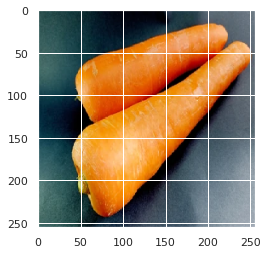

In [12]:
#Do prediction
##Load image
from keras.applications.vgg16 import preprocess_input

##Working very well, try making our own model using epoch=2 and use that?

pred_img_path = '/content/drive/MyDrive/[UNIHACKS]/pred_imgs/carrot.png' #Image path
pred_img = load_img(pred_img_path, target_size=(256, 256)) #Image loaded and resized to 256x256
x = img_to_array(pred_img) #Convert image to matrix with each point being pixel colour
x = np.expand_dims(x, axis=0) #Add an extra dimension so model understands how many rows to process at once in this case 1 row at a time
x /= 255. #Standardize pixel vals to be between 0 and 1
pred_scores = model.predict(x) #Generate prediction scores
print(np.amax(pred_scores))
pred_class = class_names[int(np.argmax(pred_scores))] #Pick the class
print(pred_class) #Print class
plt.imshow(pred_img) #print input image
